In [1]:
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("final_matrix_with_writers_with_sentiment.csv")

In [51]:
df.columns

Index(['ARTIST', 'ISRC', 'SPOTIFY_ID', 'TITLE', 'lyrics', 'song_id',
       'producer', 'number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity', 'A_Level_Artist?', 'B_Level Artist?',
       'max_popularity', 'Blues', 'Christian/Gospel', 'Country',
       'Dance/Electro', 'Disco', 'Dutch-House', 'Folk', 'Hip-Hop', 'Indie',
       'Jazz', 'Latin', 'Metal', 'Other', 'Pop', 'R&B', 'Reggae', 'Rock/Alt',
       'Rock/Alt/Pop', 'Singer-Songwriter', 'genre_missing', 'Explicit',
       'writer', 'word_count', 'sentiment'],
      dtype='object')

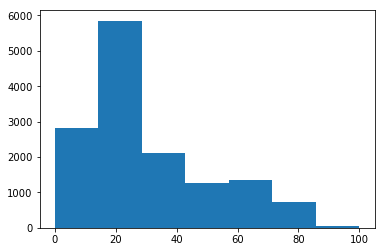

In [62]:
plt.hist(df["max_popularity"],bins=7)
plt.show()

In [56]:
df[df["max_popularity"]>70].shape[0] / df.shape[0]

0.06519742883379247

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import cluster

In [26]:
art= df[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers','average_song_popularity']] 
#art.values
art.shape
art.head()

,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,average_song_popularity
0,143,40,649,7559126,31.550633
1,143,40,649,7559126,31.550633
2,143,40,649,7559126,31.550633
3,10,10,30,425030,44.394737
4,10,10,30,425030,44.394737


In [35]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
art_trans = scaler.fit_transform(art[['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers']])
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler() 
art_trans_2 = scaler2.fit_transform(art_trans)

In [36]:
label_list = ['number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers'] 

In [37]:
art_trans

array([[  9.19689119e-02,   5.36912752e-02,   2.71095678e-02,
          1.99777261e-02],
       [  9.19689119e-02,   5.36912752e-02,   2.71095678e-02,
          1.99777261e-02],
       [  9.19689119e-02,   5.36912752e-02,   2.71095678e-02,
          1.99777261e-02],
       ..., 
       [  6.67098446e-02,   7.65100671e-02,   3.09584571e-03,
          1.05133310e-03],
       [  6.47668394e-04,   6.71140940e-03,   1.67343011e-04,
          2.94388386e-05],
       [  1.55440415e-02,   4.02684564e-02,   5.31314061e-03,
          9.57165293e-04]])

In [65]:
y_pred = cluster.KMeans(n_clusters=2, random_state=100,init = 'k-means++').fit_predict(art_trans)


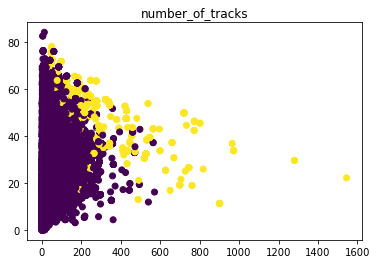

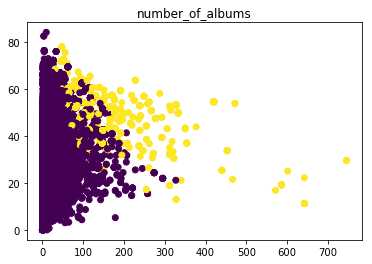

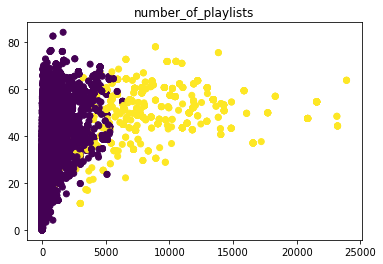

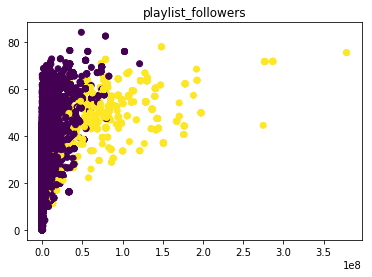

In [68]:
for i in list(range(4)):
    plt.scatter(art.values[:,i], art.values[:,4], c=y_pred)
    plt.title(label_list[i])
    plt.show()